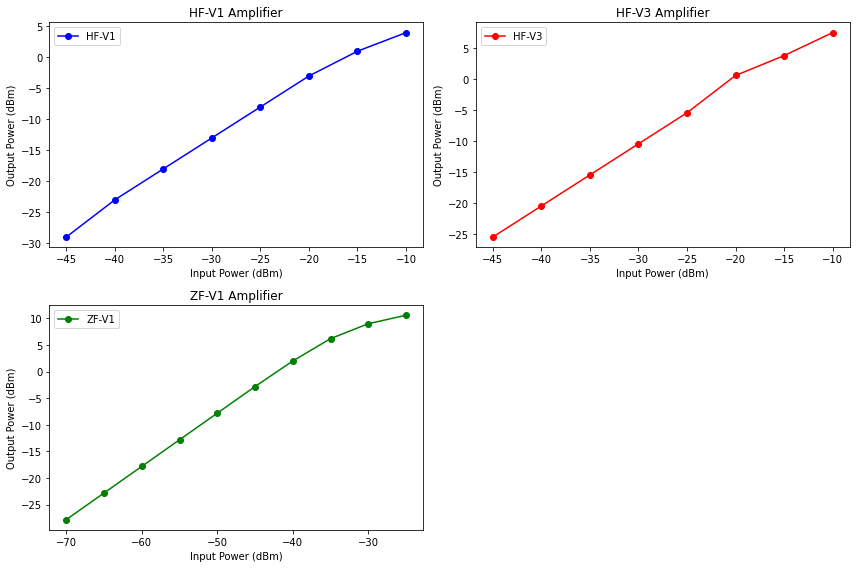

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for HF-V1
hf_v1_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v1_output = np.array([-29, -23, -18, -13, -8, -3, 1, 4])

# Data for HF-V3
hf_v3_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v3_output = np.array([-25.4, -20.4, -15.4, -10.4, -5.4, 0.6, 3.8, 7.5])

# Data for HF-V2
hf_v2_input = np.array([-70, -65, -60, -55, -50, -45, -40, -35, -30, -25])
hf_v2_output = np.array([-27.8, -22.8, -17.8, -12.8, -7.8, -2.8, 2, 6.2, 9, 10.6])

# Create plots
plt.figure(figsize=(12, 8))

# Plot HF-V1
plt.subplot(2, 2, 1)
plt.plot(hf_v1_input, hf_v1_output, 'b-o', label='HF-V1')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Output Power (dBm)')
plt.title('HF-V1 Amplifier')
plt.grid(False)
plt.legend()

# Plot HF-V3
plt.subplot(2, 2, 2)
plt.plot(hf_v3_input, hf_v3_output, 'r-o', label='HF-V3')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Output Power (dBm)')
plt.title('HF-V3 Amplifier')
plt.grid(False)
plt.legend()

# Plot ZF-V1
plt.subplot(2, 2, 3)
plt.plot(hf_v2_input, hf_v2_output, 'g-o', label='ZF-V1')
plt.xlabel('Input Power (dBm)')
plt.ylabel('Output Power (dBm)')
plt.title('ZF-V1 Amplifier')
plt.grid(False)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

# Data (linear regime: P_in ≤ -25 dBm)
hf_v3_input_linear = np.array([-45, -40, -35, -30, -25])
hf_v3_output_linear = np.array([-25.4, -20.4, -15.4, -10.4, -5.4])

# Perform linear fit (degree=1)
slope, intercept = np.polyfit(hf_v3_input_linear, hf_v3_output_linear, 1)

print(f"Slope (Gain): {slope:.2f}")
print(f"Intercept: {intercept:.2f} dBm")

Slope (Gain): 1.00
Intercept: 19.60 dBm


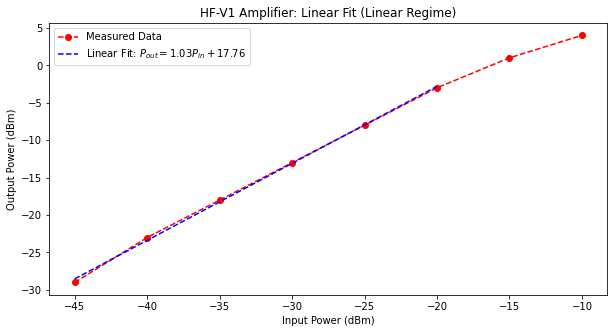


HF-V1 Analysis:
- Slope (Gain indicator): 1.03
- Intercept: 17.76 dBm
- Average Gain (Linear Regime): 16.83 dB
- Linearity Limit: P_in ≤ -20 dBm


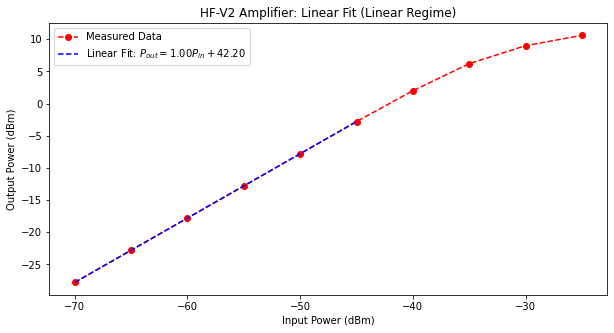


HF-V2 Analysis:
- Slope (Gain indicator): 1.00
- Intercept: 42.20 dBm
- Average Gain (Linear Regime): 42.20 dB
- Linearity Limit: P_in ≤ -45 dBm


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data for HF-V1
hf_v1_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v1_output = np.array([-29, -23, -18, -13, -8, -3, 1, 4])

# Data for HF-V2
hf_v2_input = np.array([-70, -65, -60, -55, -50, -45, -40, -35, -30, -25])
hf_v2_output = np.array([-27.8, -22.8, -17.8, -12.8, -7.8, -2.8, 2, 6.2, 9, 10.6])

# Linear fit function
def analyze_amplifier(name, input_power, output_power, linear_max_input):
    linear_mask = input_power <= linear_max_input
    input_linear = input_power[linear_mask]
    output_linear = output_power[linear_mask]
    
    slope, intercept = np.polyfit(input_linear, output_linear, 1)
    gain_db = output_linear - input_linear
    plt.figure(figsize=(10, 5))
    plt.plot(input_power, output_power, 'o--r', label='Measured Data')
    plt.plot(input_linear, slope * input_linear + intercept, 'b--', 
             label=f'Linear Fit: $P_{{out}} = {slope:.2f}P_{{in}} + {intercept:.2f}$')
    plt.xlabel('Input Power (dBm)')
    plt.ylabel('Output Power (dBm)')
    plt.title(f'{name} Amplifier: Linear Fit (Linear Regime)')
    plt.grid(False)
    plt.legend()
    plt.show()
    
    # Print summary
    print(f"\n{name} Analysis:")
    print(f"- Slope (Gain indicator): {slope:.2f}")
    print(f"- Intercept: {intercept:.2f} dBm")
    print(f"- Average Gain (Linear Regime): {np.mean(gain_db):.2f} dB")
    print(f"- Linearity Limit: P_in ≤ {linear_max_input} dBm")

# Analyze HF-V1 (linear regime: P_in ≤ -20 dBm)
analyze_amplifier("HF-V1", hf_v1_input, hf_v1_output, linear_max_input=-20)

# Analyze HF-V2 (linear regime: P_in ≤ -45 dBm)
analyze_amplifier("HF-V2", hf_v2_input, hf_v2_output, linear_max_input=-45)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

# Create directory to save plots
os.makedirs('amplifier_plots', exist_ok=True)

# Data for HF-V1
hf_v1_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v1_output = np.array([-29, -23, -18, -13, -8, -3, 1, 4])

# Data for HF-V2
hf_v2_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v2_output = np.array([-25.4, -20.4, -15.4, -10.4, -5.4, 0.6, 3.8, 7.5])

# Data for ZV-V1
zv_v1_input = np.array([-70, -65, -60, -55, -50, -45, -40, -35, -30, -25])
zv_v1_output = np.array([-27.8, -22.8, -17.8, -12.8, -7.8, -2.8, 2, 6.2, 9, 10.6])

def analyze_amplifier(name, input_power, output_power, linear_max_input):
    # Select linear regime data
    linear_mask = input_power <= linear_max_input
    input_linear = input_power[linear_mask]
    output_linear = output_power[linear_mask]
    
    # Perform linear regression with uncertainty
    slope, intercept, r_value, p_value, std_err = stats.linregress(input_linear, output_linear)
    gain_db = output_linear - input_linear
    
    # Calculate intercept uncertainty (1 standard error)
    n = len(input_linear)
    x_mean = np.mean(input_linear)
    Sxx = np.sum((input_linear - x_mean)**2)
    intercept_uncertainty = std_err * np.sqrt(np.sum(input_linear**2)/(n * Sxx))
    
    # Create plot (unchanged from previous version)
    plt.figure(figsize=(10, 6))
    plt.plot(input_power, output_power, '.--r', label='Measured Data')
    plt.plot(input_linear, slope * input_linear + intercept, 'b--', 
             label=f'Linear Fit: slope={slope:.2f}, intercept={intercept:.2f} dBm')
    
    if name != 'ZV-V1':
        plt.axvline(x=linear_max_input, color='gray', linestyle=':', 
                    label=f'1dB Compression ~{linear_max_input} dBm')
    
    plt.xlabel('Input Power (dBm)')
    plt.ylabel('Output Power (dBm)')
    plt.title(f'{name} Amplifier Characteristics\n'
              f'Avg Gain: {np.mean(gain_db):.2f} dB | Linear Range: ≤ {linear_max_input} dBm')
    plt.grid(False)
    plt.legend()
    
    # Save plot
    filename = f'amplifier_plots/{name.replace("-", "_")}_characteristics.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    # Print results with uncertainty
    print(f"\n{name} Analysis:")
    print(f"- Slope: {slope:.2f} ± {std_err:.2f}")
    print(f"- Intercept: {intercept:.2f} ± {intercept_uncertainty:.2f} dBm (1 SE)")
    print(f"- R-squared: {r_value**2:.4f}")
    print(f"- Avg Gain (Linear Regime): {np.mean(gain_db):.2f} dB")
    print(f"- Linear Range: P_in ≤ {linear_max_input} dBm")
    print(f"- Plot saved to: {filename}")

# Analyze all amplifiers
analyze_amplifier("HF-V1", hf_v1_input, hf_v1_output, linear_max_input=-20)
analyze_amplifier("HF-V2", hf_v2_input, hf_v2_output, linear_max_input=-25)
analyze_amplifier("ZV-V1", zv_v1_input, zv_v1_output, linear_max_input=-45)

print("\nAnalysis complete! All plots saved in 'amplifier_plots' directory.")


HF-V1 Analysis:
- Slope: 1.03 ± 0.02
- Intercept: 17.76 ± 0.03 dBm (1 SE)
- R-squared: 0.9990
- Avg Gain (Linear Regime): 16.83 dB
- Linear Range: P_in ≤ -20 dBm
- Plot saved to: amplifier_plots/HF_V1_characteristics.png

HF-V2 Analysis:
- Slope: 1.00 ± 0.00
- Intercept: 19.60 ± 0.00 dBm (1 SE)
- R-squared: 1.0000
- Avg Gain (Linear Regime): 19.60 dB
- Linear Range: P_in ≤ -25 dBm
- Plot saved to: amplifier_plots/HF_V2_characteristics.png

ZV-V1 Analysis:
- Slope: 1.00 ± 0.00
- Intercept: 42.20 ± 0.00 dBm (1 SE)
- R-squared: 1.0000
- Avg Gain (Linear Regime): 42.20 dB
- Linear Range: P_in ≤ -45 dBm
- Plot saved to: amplifier_plots/ZV_V1_characteristics.png

Analysis complete! All plots saved in 'amplifier_plots' directory.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

# Create directory to save plots
os.makedirs('amplifier_plots', exist_ok=True)

# Data for HF-V1
hf_v1_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v1_output = np.array([-29, -23, -18, -13, -8, -3, 1, 4])

# Data for HF-V2
hf_v2_input = np.array([-45, -40, -35, -30, -25, -20, -15, -10])
hf_v2_output = np.array([-25.4, -20.4, -15.4, -10.4, -5.4, 0.6, 3.8, 7.5])

# Data for ZV-V1
zv_v1_input = np.array([-70, -65, -60, -55, -50, -45, -40, -35, -30, -25])
zv_v1_output = np.array([-27.8, -22.8, -17.8, -12.8, -7.8, -2.8, 2, 6.2, 9, 10.6])

def analyze_amplifier(name, input_power, output_power, linear_max_input):
    linear_mask = input_power <= linear_max_input
    input_linear = input_power[linear_mask]
    output_linear = output_power[linear_mask]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(input_linear, output_linear)
    gain_db = output_linear - input_linear
    
    n = len(input_linear)
    x_mean = np.mean(input_linear)
    Sxx = np.sum((input_linear - x_mean)**2)
    intercept_uncertainty = std_err * np.sqrt(np.sum(input_linear**2)/(n * Sxx))
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(input_power, output_power, '.--r', markersize=8, label='Measured Data')
    
    # Plot linear fit line
    fit_line = slope * input_linear + intercept
    plt.plot(input_linear, fit_line, 'b--', 
             label=f'Linear Fit: slope={slope:.2f} ± {std_err:.2f}\nintercept={intercept:.2f} ± {intercept_uncertainty:.2f} dBm')
    
    plt.axvline(x=linear_max_input, color='gray', linestyle=':', alpha=0.7)
    
    if name == 'ZV-V1':
        label_x = linear_max_input + 5  # Right offset for ZV-V1
    else:
        label_x = linear_max_input - 5  # Left offset for others
        
    plt.text(label_x, np.mean(output_power), 
             f'Linear limit\n{linear_max_input} dBm',
             color='gray', ha='center')
    
    plt.xlabel('Input Power (dBm)', fontsize=12)
    plt.ylabel('Output Power (dBm)', fontsize=12)
    plt.title(f'{name} Amplifier Characteristics\n'
              f'Avg Gain: {np.mean(gain_db):.2f} dB | Linear Range: ≤ {linear_max_input} dBm', 
              fontsize=14)
    plt.grid(False)
    plt.legend(fontsize=10, loc='upper left')
    
    # Save plot
    filename = f'amplifier_plots/{name.replace("-", "_")}_characteristics.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n{name} Analysis:")
    print(f"- Slope: {slope:.2f} ± {std_err:.2f}")
    print(f"- Intercept: {intercept:.2f} ± {intercept_uncertainty:.2f} dBm (1 SE)")
    print(f"- R-squared: {r_value**2:.4f}")
    print(f"- Avg Gain (Linear Regime): {np.mean(gain_db):.2f} dB")
    print(f"- Linear Range: P_in ≤ {linear_max_input} dBm")
    print(f"- Plot saved to: {filename}")

analyze_amplifier("HF-V1", hf_v1_input, hf_v1_output, linear_max_input=-20)
analyze_amplifier("HF-V2", hf_v2_input, hf_v2_output, linear_max_input=-25)
analyze_amplifier("ZV-V1", zv_v1_input, zv_v1_output, linear_max_input=-45)

print("\nAnalysis complete! All plots saved in 'amplifier_plots' directory.")


HF-V1 Analysis:
- Slope: 1.03 ± 0.02
- Intercept: 17.76 ± 0.03 dBm (1 SE)
- R-squared: 0.9990
- Avg Gain (Linear Regime): 16.83 dB
- Linear Range: P_in ≤ -20 dBm
- Plot saved to: amplifier_plots/HF_V1_characteristics.png

HF-V2 Analysis:
- Slope: 1.00 ± 0.00
- Intercept: 19.60 ± 0.00 dBm (1 SE)
- R-squared: 1.0000
- Avg Gain (Linear Regime): 19.60 dB
- Linear Range: P_in ≤ -25 dBm
- Plot saved to: amplifier_plots/HF_V2_characteristics.png

ZV-V1 Analysis:
- Slope: 1.00 ± 0.00
- Intercept: 42.20 ± 0.00 dBm (1 SE)
- R-squared: 1.0000
- Avg Gain (Linear Regime): 42.20 dB
- Linear Range: P_in ≤ -45 dBm
- Plot saved to: amplifier_plots/ZV_V1_characteristics.png

Analysis complete! All plots saved in 'amplifier_plots' directory.


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

import os
os.makedirs('filter_plots', exist_ok=True)

hf_freq = np.array([2.1, 2.2, 2.25, 2.255, 2.26, 2.27, 2.28, 2.29, 
                    2.3, 2.31, 2.32, 2.33, 2.34, 2.35, 2.4, 2.5])
hf_power = np.array([-32, -16.8, -2.4, -0.4, 0.8, 1.6, 1.6, 1.8, 
                     1.8, 1.8, 1.8, 1.8, 1.8, 0.5, -14.4, -35])

# ZF-F1 Filter Data (MHz)
zf_freq = np.array([120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 
                    170, 171, 172, 172.5, 173, 173.5, 174, 174.5, 175, 176, 177, 180, 185, 190])
zf_power = np.array([-11.4, -9.4, -7.2, -5.4, -4, -3.6, -4.2, -5, -5, -4,
                     -1.4, -0.6, 0, 0.2, 0.6, 0.6, 0.6, 0.6, 0.2, -0.8, -2.2, -7, -14, -19.2])

def analyze_filter(name, frequencies, power, freq_unit, input_power=0):
    # Sort data by frequency
    sort_idx = np.argsort(frequencies)
    frequencies = frequencies[sort_idx]
    power = power[sort_idx]
    
    # Find peak (central frequency)
    peaks, _ = find_peaks(power, height=np.max(power)-1)
    if len(peaks) == 0:
        central_freq = frequencies[np.argmax(power)]
    else:
        central_freq = frequencies[peaks[0]]
    max_power = np.max(power)
    
    # Insertion loss (assuming 0 dBm input power)
    insertion_loss = input_power - max_power
    
    # Bandwidth calculation (3dB points)
    half_power = max_power - 3
    interp_func = interp1d(frequencies, power, kind='linear')
    freq_range = np.linspace(min(frequencies), max(frequencies), 1000)
    interp_power = interp_func(freq_range)
    
    # Find 3dB points
    above = interp_power >= half_power
    if np.any(above):
        lower_idx = np.where(above)[0][0]
        upper_idx = np.where(above)[0][-1]
        lower_3db = freq_range[lower_idx]
        upper_3db = freq_range[upper_idx]
        bandwidth = upper_3db - lower_3db
    else:
        lower_3db = upper_3db = bandwidth = np.nan
    
    # Adjacent band rejection (average of worst 2 points outside bandwidth)
    if not np.isnan(bandwidth):
        mask = (frequencies < lower_3db) | (frequencies > upper_3db)
        rejection = np.mean(np.sort(power[mask])[:2])  # Two worst points
    else:
        rejection = np.min(power)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, power, 'b.-', label='Measured Data')
    
    # Mark central frequency
    plt.axvline(central_freq, color='r', linestyle='--', alpha=0.5, 
                label=f'Central Freq: {central_freq:.3f} {freq_unit}')
    
    # Mark 3dB bandwidth if available
    if not np.isnan(bandwidth):
        plt.axvspan(lower_3db, upper_3db, color='g', alpha=0.1, 
                   label=f'3dB BW: {bandwidth:.3f} {freq_unit}')
        plt.axhline(half_power, color='g', linestyle=':', alpha=0.5)
    
    plt.xlabel(f'Frequency ({freq_unit})', fontsize=12)
    plt.ylabel('Output Power (dBm)', fontsize=12)
    plt.title(f'{name} Filter Characteristics\n'
             f'Insertion Loss: {insertion_loss:.2f} dB | '
             f'Rejection: {rejection:.1f} dB | '
             f'Central Freq: {central_freq:.3f} {freq_unit}', fontsize=13)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(fontsize=10)
    
    # Save plot
    filename = f'filter_plots/{name.replace("-", "_")}_response.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    # Print results
    print(f"\n{name} Filter Analysis:")
    print(f"- Central Frequency: {central_freq:.3f} {freq_unit}")
    print(f"- Insertion Loss: {insertion_loss:.2f} dB")
    if not np.isnan(bandwidth):
        print(f"- 3dB Bandwidth: {bandwidth:.3f} {freq_unit} ({lower_3db:.3f}-{upper_3db:.3f} {freq_unit})")
    else:
        print("- 3dB Bandwidth: Could not be determined")
    print(f"- Adjacent-Band Rejection: {rejection:.1f} dB")
    print(f"- Plot saved to: {filename}")

# Analyze both filters
analyze_filter("HF-F1", hf_freq, hf_power, "GHz", input_power=2)  # Assuming 2 dBm input
analyze_filter("ZF-F1", zf_freq, zf_power, "MHz", input_power=0)  # Assuming 0 dBm input

print("\nFilter analysis complete! Plots saved in 'filter_plots' directory.")


HF-F1 Filter Analysis:
- Central Frequency: 2.310 GHz
- Insertion Loss: 0.20 dB
- 3dB Bandwidth: 0.102 GHz (2.253-2.355 GHz)
- Adjacent-Band Rejection: -33.5 dB
- Plot saved to: filter_plots/HF_F1_response.png

ZF-F1 Filter Analysis:
- Central Frequency: 173.500 MHz
- Insertion Loss: -0.60 dB
- 3dB Bandwidth: 8.969 MHz (168.138-177.107 MHz)
- Adjacent-Band Rejection: -16.6 dB
- Plot saved to: filter_plots/ZF_F1_response.png

Filter analysis complete! Plots saved in 'filter_plots' directory.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Create directory for plots
import os
os.makedirs('filter_plots', exist_ok=True)

# HF-F1 Filter Data (GHz)
hf_freq = np.array([2.1, 2.2, 2.25, 2.255, 2.26, 2.27, 2.28, 2.29, 
                    2.3, 2.31, 2.32, 2.33, 2.34, 2.35, 2.4, 2.5])
hf_power = np.array([-32, -16.8, -2.4, -0.4, 0.8, 1.6, 1.6, 1.8, 
                     1.8, 1.8, 1.8, 1.8, 1.8, 0.5, -14.4, -35])

# ZF-F1 Filter Data (MHz)
zf_freq = np.array([120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 
                    170, 171, 172, 172.5, 173, 173.5, 174, 174.5, 175, 176, 177, 180, 185, 190])
zf_power = np.array([-11.4, -9.4, -7.2, -5.4, -4, -3.6, -4.2, -5, -5, -4,
                     -1.4, -0.6, 0, 0.2, 0.6, 0.6, 0.6, 0.6, 0.2, -0.8, -2.2, -7, -14, -19.2])

def analyze_filter(name, frequencies, power, freq_unit, input_power=0, xlim=None):
    # Sort data by frequency
    sort_idx = np.argsort(frequencies)
    frequencies = frequencies[sort_idx]
    power = power[sort_idx]
    
    # Find peak (central frequency)
    peaks, _ = find_peaks(power, height=np.max(power)-1)
    if len(peaks) == 0:
        central_freq = frequencies[np.argmax(power)]
    else:
        central_freq = frequencies[peaks[0]]
    max_power = np.max(power)
    
    # Insertion loss (assuming input power)
    insertion_loss = input_power - max_power
    
    # Bandwidth calculation (3dB points)
    half_power = max_power - 3
    interp_func = interp1d(frequencies, power, kind='linear')
    freq_range = np.linspace(min(frequencies), max(frequencies), 1000)
    interp_power = interp_func(freq_range)
    
    # Find 3dB points
    above = interp_power >= half_power
    if np.any(above):
        lower_idx = np.where(above)[0][0]
        upper_idx = np.where(above)[0][-1]
        lower_3db = freq_range[lower_idx]
        upper_3db = freq_range[upper_idx]
        bandwidth = upper_3db - lower_3db
    else:
        lower_3db = upper_3db = bandwidth = np.nan
    
    # Adjacent band rejection
    if not np.isnan(bandwidth):
        mask = (frequencies < lower_3db) | (frequencies > upper_3db)
        rejection = np.mean(np.sort(power[mask])[:2])
    else:
        rejection = np.min(power)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, power, 'b.-', markersize=8, label='Measured Data')
    
    # Mark central frequency
    plt.axvline(central_freq, color='r', linestyle='--', alpha=0.7, 
                label=f'Center: {central_freq:.3f} {freq_unit}')
    
    # Mark 3dB bandwidth if available
    if not np.isnan(bandwidth):
        plt.axvspan(lower_3db, upper_3db, color='g', alpha=0.1, 
                   label=f'3dB BW: {bandwidth:.3f} {freq_unit}')
        plt.axhline(half_power, color='g', linestyle=':', alpha=0.7,
                   label='-3 dB Level (Half Power)')
    
    plt.xlabel(f'Frequency ({freq_unit})', fontsize=12)
    plt.ylabel('Output Power (dBm)', fontsize=12)
    plt.title(f'{name} Filter Response\n'
             f'Rejection: {rejection:.1f} dB', fontsize=13)
    
    if xlim:
        plt.xlim(xlim)  # Set custom x-axis limits
    
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.legend(fontsize=10, loc='upper right' if name == 'ZF-F1' else 'best')
    
    # Save plot
    filename = f'filter_plots/{name.replace("-", "_")}_response.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    # Print results
    print(f"\n{name} Filter Analysis:")
    print(f"- Central Frequency: {central_freq:.3f} {freq_unit}")
    print(f"- Insertion Loss: {insertion_loss:.2f} dB")
    if not np.isnan(bandwidth):
        print(f"- 3dB Bandwidth: {bandwidth:.3f} {freq_unit} ({lower_3db:.3f}-{upper_3db:.3f} {freq_unit})")
    else:
        print("- 3dB Bandwidth: Could not be determined")
    print(f"- Adjacent-Band Rejection: {rejection:.1f} dB")
    print(f"- Plot saved to: {filename}")

# Analyze both filters
analyze_filter("HF-F1", hf_freq, hf_power, "GHz", input_power=2)
analyze_filter("ZF-F1", zf_freq, zf_power, "MHz", input_power=0, xlim=(155, 190))

print("\nFilter analysis complete! Plots saved in 'filter_plots' directory.")


HF-F1 Filter Analysis:
- Central Frequency: 2.310 GHz
- Insertion Loss: 0.20 dB
- 3dB Bandwidth: 0.102 GHz (2.253-2.355 GHz)
- Adjacent-Band Rejection: -33.5 dB
- Plot saved to: filter_plots/HF_F1_response.png

ZF-F1 Filter Analysis:
- Central Frequency: 173.500 MHz
- Insertion Loss: -0.60 dB
- 3dB Bandwidth: 8.969 MHz (168.138-177.107 MHz)
- Adjacent-Band Rejection: -16.6 dB
- Plot saved to: filter_plots/ZF_F1_response.png

Filter analysis complete! Plots saved in 'filter_plots' directory.


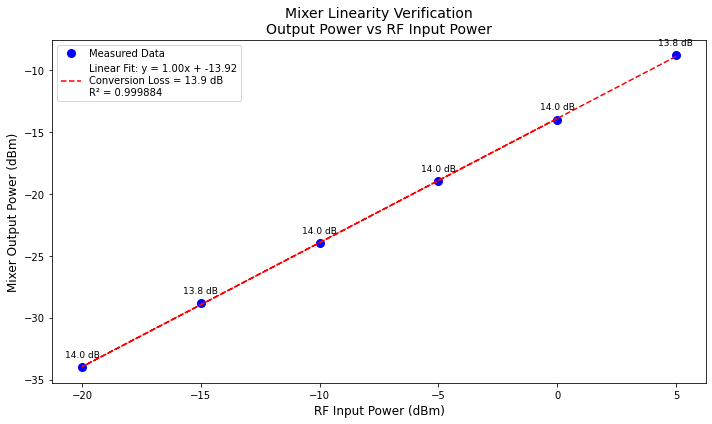


Linear Regression Results:
Slope: 1.0023 ± 0.0054
Intercept: -13.9162 dBm
R-squared: 0.999884
Average Conversion Loss: 13.93 dB


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
rf_power = np.array([0, -5, -10, -15, -20, 5])  # RF input power (dBm)
output_power = np.array([-14, -19, -24, -28.8, -34, -8.8])  # Mixer output (dBm)

# Calculate conversion loss
conversion_loss = rf_power - output_power
avg_loss = np.mean(conversion_loss)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(rf_power, output_power)
fit_line = slope * rf_power + intercept

# Create the plot
plt.figure(figsize=(10, 6))

# Plot measured data
plt.plot(rf_power, output_power, 'bo', markersize=8, label='Measured Data')

# Plot linear fit
plt.plot(rf_power, fit_line, 'r--', 
         label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}\n'
               f'Conversion Loss = {avg_loss:.1f} dB\n'
               f'R² = {r_value**2:.6f}')

# Add labels and title
plt.xlabel('RF Input Power (dBm)', fontsize=12)
plt.ylabel('Mixer Output Power (dBm)', fontsize=12)
plt.title('Mixer Linearity Verification\nOutput Power vs RF Input Power', fontsize=14)

# Add grid and legend
plt.grid(False)
plt.legend(fontsize=10, loc='best')

# Annotate the conversion loss
for i, (rf, out) in enumerate(zip(rf_power, output_power)):
    plt.annotate(f'{conversion_loss[i]:.1f} dB', 
                (rf, out), 
                textcoords="offset points",
                xytext=(0,10), 
                ha='center',
                fontsize=9)

# Show plot
plt.tight_layout()
plt.savefig('mixer_linearity.png', dpi=300)
plt.show()

# Print statistical results
print(f"\nLinear Regression Results:")
print(f"Slope: {slope:.4f} ± {std_err:.4f}")
print(f"Intercept: {intercept:.4f} dBm")
print(f"R-squared: {r_value**2:.6f}")
print(f"Average Conversion Loss: {avg_loss:.2f} dB")

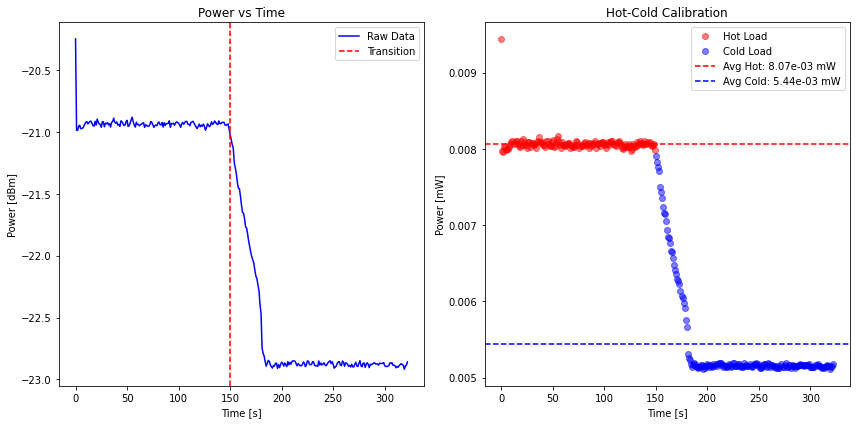

Average Hot Power: 8.0667e-03 mW (-20.93 dBm)
Average Cold Power: 5.4406e-03 mW (-22.64 dBm)
Calculated Receiver Temperature: 364.29 K


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load data
data = np.loadtxt('ex1-5-hot-cold.txt', skiprows=1)
time = data[:, 0]
power_dBm = data[:, 1]

power_mW = 10 ** (power_dBm / 10)

transition_idx = np.where(time >= 150)[0][0]

hot_time = time[:transition_idx]
hot_power_mW = power_mW[:transition_idx]
cold_time = time[transition_idx:]
cold_power_mW = power_mW[transition_idx:]

avg_hot = np.mean(hot_power_mW)
avg_cold = np.mean(cold_power_mW)

T_hot = 290  # K (typical ambient temperature)
T_cold = 77   # K (typical liquid nitrogen temperature)

# Calculate receiver temperature using the formula
T_rec = avg_cold * (T_hot - T_cold) / (avg_hot - avg_cold) - T_cold

# Create the plot
plt.figure(figsize=(12, 6))

# Plot raw data
plt.subplot(1, 2, 1)
plt.plot(time, power_dBm, 'b-', label='Raw Data')
plt.axvline(x=150, color='r', linestyle='--', label='Transition')
plt.xlabel('Time [s]')
plt.ylabel('Power [dBm]')
plt.title('Power vs Time')
plt.legend()
plt.grid(False)

# Plot calibrated data
plt.subplot(1, 2, 2)
plt.plot(hot_time, hot_power_mW, 'ro', alpha=0.5, label='Hot Load')
plt.plot(cold_time, cold_power_mW, 'bo', alpha=0.5, label='Cold Load')
plt.axhline(y=avg_hot, color='r', linestyle='--', label=f'Avg Hot: {avg_hot:.2e} mW')
plt.axhline(y=avg_cold, color='b', linestyle='--', label=f'Avg Cold: {avg_cold:.2e} mW')
plt.xlabel('Time [s]')
plt.ylabel('Power [mW]')
plt.title(f'Hot-Cold Calibration')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.savefig("hot_cold.jpg")
plt.show()

print(f"Average Hot Power: {avg_hot:.4e} mW ({10*np.log10(avg_hot):.2f} dBm)")
print(f"Average Cold Power: {avg_cold:.4e} mW ({10*np.log10(avg_cold):.2f} dBm)")
print(f"Calculated Receiver Temperature: {T_rec:.2f} K")

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Given calibration values (from your manual calculation)
P_cold_mW = 0.00544  # mW
P_hot_mW = 0.00807   # mW
T_cold = 77           # K
T_hot = 290           # K

# Calculate T_rec using the formula
numerator = P_cold_mW * (T_hot - T_cold)
denominator = P_hot_mW - P_cold_mW
T_rec = numerator / denominator - T_cold

print(f"Receiver Temperature Calculation:")
print(f"Using P_cold = {P_cold_mW:.5f} mW, P_hot = {P_hot_mW:.5f} mW")
print(f"T_rec = {P_cold_mW:.5f} * ({T_hot} - {T_cold}) / ({P_hot_mW:.5f} - {P_cold_mW:.5f}) - {T_cold}")
print(f"T_rec = {T_rec:.2f} K")

# Load full dataset for comparison
data = np.loadtxt('ex1-5-hot-cold.txt', skiprows=1)
power_dBm = data[:, 1]
power_mW = 10 ** (power_dBm / 10)

# Split data (transition at t=150s)
transition_idx = np.where(data[:, 0] >= 150)[0][0]
hot_power_mW = power_mW[:transition_idx]
cold_power_mW = power_mW[transition_idx:]

# Calculate averages from full dataset
avg_hot = np.mean(hot_power_mW)
avg_cold = np.mean(cold_power_mW)

# Calculate T_rec from full dataset averages
T_rec_full = avg_cold * (T_hot - T_cold) / (avg_hot - avg_cold) - T_cold

print("\nComparison with full dataset averages:")
print(f"Avg P_hot = {avg_hot:.5f} mW, Avg P_cold = {avg_cold:.5f} mW")
print(f"T_rec (full data) = {T_rec_full:.2f} K")

Receiver Temperature Calculation:
Using P_cold = 0.00544 mW, P_hot = 0.00807 mW
T_rec = 0.00544 * (290 - 77) / (0.00807 - 0.00544) - 77
T_rec = 363.58 K

Comparison with full dataset averages:
Avg P_hot = 0.00807 mW, Avg P_cold = 0.00544 mW
T_rec (full data) = 364.29 K


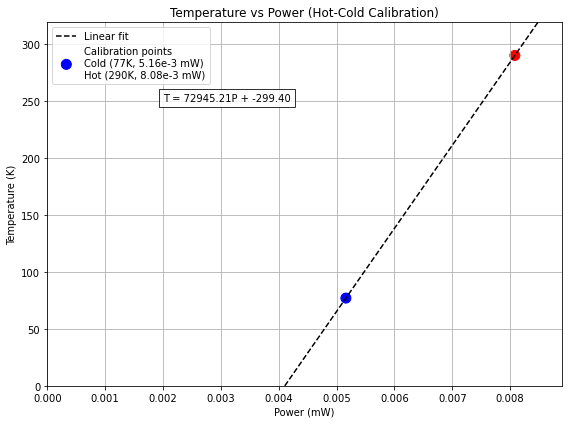


Linear Fit Results:
Slope: 72945.21 K/mW
Intercept: -299.40 K
R-squared: 1.000000
Standard error: 0.00

Receiver Temperature Calculation:
T_rec = -intercept/slope = 0.00 K


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given calibration points
power = np.array([5.16e-3, 8.08e-3])  # mW (x-axis)
temp = np.array([77, 290])             # K (y-axis)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(power, temp)

# Generate line for plotting
fit_power = np.linspace(0, max(power)*1.1, 100)
fit_temp = slope * fit_power + intercept

# Create the plot
plt.figure(figsize=(8, 6))

# Plot calibration points
plt.scatter(power, temp, c=['blue', 'red'], s=100, 
            label='Calibration points\nCold (77K, 5.16e-3 mW)\nHot (290K, 8.08e-3 mW)')

# Plot linear fit
plt.plot(fit_power, fit_temp, 'k--', 
         label='Linear fit')

# Plot formatting
plt.xlabel('Power (mW)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs Power (Hot-Cold Calibration)')
plt.legend()
plt.grid(True)
plt.xlim(0, max(power)*1.1)
plt.ylim(0, max(temp)*1.1)

# Add equation text
plt.text(0.002, 250, f'T = {slope:.2f}P + {intercept:.2f}', 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print results to screen
print("\nLinear Fit Results:")
print(f"Slope: {slope:.2f} K/mW")
print(f"Intercept: {intercept:.2f} K")
print(f"R-squared: {r_value**2:.6f}")
print(f"Standard error: {std_err:.2f}")
print("\nReceiver Temperature Calculation:")
print(f"T_rec = -intercept/slope = {-intercept/slope:.2f} K")

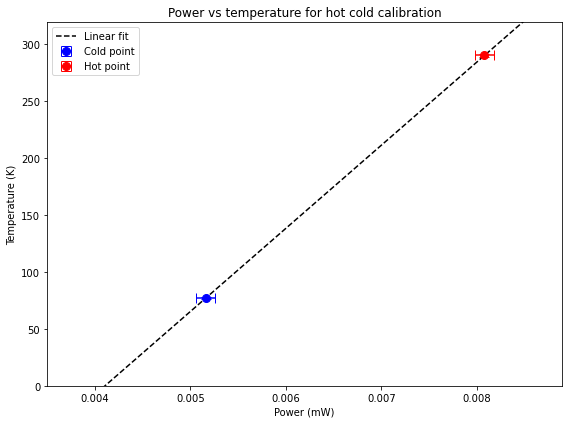


Calibration Results:
Slope: 72945.21 ± 3565.92 K/mW
Intercept: -299.40 ± 10.41 K
T_rec: 0.00 ± 0.00 K
Standard error of estimate: 0.00 K


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calibration points
power = np.array([5.16e-3, 8.08e-3])  # mW (x-axis)
temp = np.array([77, 290])             # K (y-axis)

# Assume some measurement uncertainties (example values)
power_err = np.array([0.0001, 0.0001])  # ±0.0001 mW uncertainty
temp_err = np.array([1, 1])             # ±1 K uncertainty

# Linear regression
slope, intercept, _, _, stderr = linregress(power, temp)

# Calculate errors for slope and intercept
# For two points, we can estimate errors using error propagation
delta_p = power[1] - power[0]
delta_t = temp[1] - temp[0]

# Error in slope
slope_err = np.sqrt((temp_err[0]/delta_p)**2 + (temp_err[1]/delta_p)**2 + 
                   (delta_t*power_err[0]/delta_p**2)**2 + (delta_t*power_err[1]/delta_p**2)**2)

# Error in intercept
intercept_err = np.sqrt((temp_err[0])**2 + (temp_err[1])**2 +
               (slope*power_err[0])**2 + (slope*power_err[1])**2)

# Error in T_rec (error propagation)
T_rec = -intercept/slope
T_rec_err = T_rec * np.sqrt((intercept_err/intercept)**2 + (slope_err/slope)**2)

# Create plot
plt.figure(figsize=(8, 6))

# Plot calibration points with error bars
plt.errorbar(power[0], temp[0], xerr=power_err[0], yerr=temp_err[0], 
             fmt='o', c='blue', markersize=8, capsize=5, label='Cold point')
plt.errorbar(power[1], temp[1], xerr=power_err[1], yerr=temp_err[1], 
             fmt='o', c='red', markersize=8, capsize=5, label='Hot point')

# Plot linear fit
fit_power = np.linspace(0.0035, max(power)*1.1, 100)
plt.plot(fit_power, slope*fit_power + intercept, 'k--', label='Linear fit')

# Plot formatting
plt.title("Power vs temperature for hot cold calibration")
plt.xlabel('Power (mW)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(False)
plt.xlim(0.0035, max(power)*1.1)
plt.ylim(0, max(temp)*1.1)

plt.tight_layout()
plt.savefig("hot_cold_2_slope.jpg")
plt.show()

# Print results
print("\nCalibration Results:")
print(f"Slope: {slope:.2f} ± {slope_err:.2f} K/mW")
print(f"Intercept: {intercept:.2f} ± {intercept_err:.2f} K")
print(f"T_rec: {T_rec:.2f} ± {T_rec_err:.2f} K")
print(f"Standard error of estimate: {stderr:.2f} K")

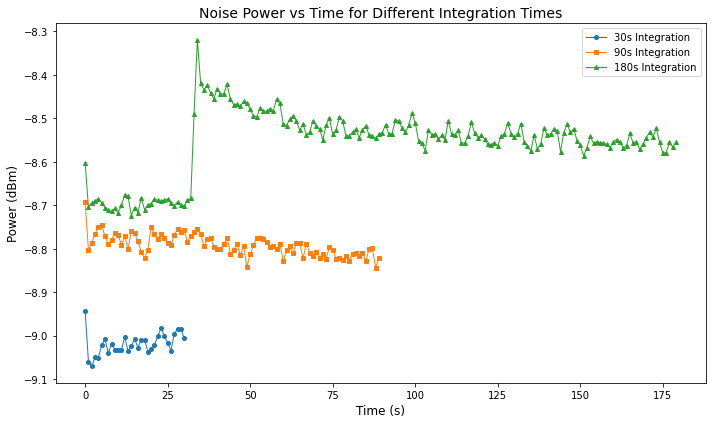

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from files
def load_data(filename):
    time, power = [], []
    with open(filename, 'r') as f:
        next(f)  # Skip header
        for line in f:
            t, p = line.strip().split('\t')
            time.append(float(t))
            power.append(float(p))
    return np.array(time), np.array(power)

# Load all datasets
time_30s, power_30s = load_data('noisecalib30s.txt')  # Correct filename if needed
time_90s, power_90s = load_data('noisecalib90s.txt')
time_180s, power_180s = load_data('noisecalib180s.txt')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each dataset with labels
plt.plot(time_30s, power_30s, label='30s Integration', marker='o', markersize=4, linestyle='-', linewidth=1)
plt.plot(time_90s, power_90s, label='90s Integration', marker='s', markersize=4, linestyle='-', linewidth=1)
plt.plot(time_180s, power_180s, label='180s Integration', marker='^', markersize=4, linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Power (dBm)', fontsize=12)
plt.title('Noise Power vs Time for Different Integration Times', fontsize=14)
plt.grid(False)
plt.legend(fontsize=10)
plt.savefig("Noise_powe_time.jpg")
plt.tight_layout()


# Save and show
plt.savefig('noise_power_comparison.png', dpi=300)
plt.show()

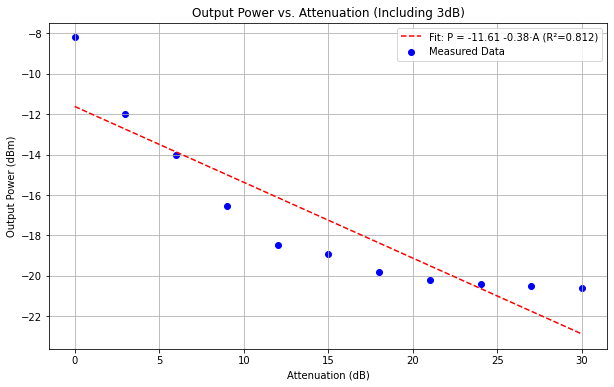

Fitted slope: -0.375 (expected: -1.000)
Input power estimate (at A=0): -11.613 dBm
R-squared: 0.812073


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Attenuation values (dB) - now includes 3dB
attenuations = np.array([0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30])

# Average power (dBm) for each attenuation (excluding t=0)
avg_powers = np.array([
    np.mean([-8.223, -8.218, -8.222, -8.234, -8.209, -8.181, -8.142, -8.194, -8.179, -8.181, -8.189]),  # 0dB
    np.mean([-11.975, -12.012, -12.018, -11.942, -12.091, -12.015, -11.949, -11.968, -11.990]),           # 3dB
    np.mean([-14.114, -14.099, -14.072, -14.073, -13.995, -13.979, -13.987, -13.965, -13.973, -13.957]),  # 6dB
    np.mean([-16.527, -16.475, -16.542, -16.615, -16.604, -16.568, -16.546, -16.559, -16.551]),           # 9dB
    np.mean([-18.521, -18.477, -18.457, -18.462, -18.451, -18.452, -18.476, -18.457, -18.468, -18.477, -18.438]),  # 12dB
    np.mean([-18.974, -18.957, -18.947, -18.966, -18.938, -18.920, -18.905, -18.929, -18.932, -18.932, -18.923, -18.938]),  # 15dB
    np.mean([-19.846, -19.833, -19.802, -19.808, -19.803, -19.803, -19.772, -19.806, -19.811]),           # 18dB
    np.mean([-20.228, -20.209, -20.187, -20.194, -20.192, -20.201, -20.185, -20.162, -20.170, -20.174]),  # 21dB
    np.mean([-20.436, -20.431, -20.404, -20.368, -20.350, -20.381, -20.372, -20.366, -20.360, -20.366, -20.396]),  # 24dB
    np.mean([-20.557, -20.518, -20.520, -20.494, -20.508, -20.524, -20.490, -20.509, -20.505, -20.489, -20.511]),  # 27dB
    np.mean([-20.637, -20.638, -20.651, -20.638, -20.628, -20.611, -20.600, -20.590, -20.605])           # 30dB
])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(attenuations, avg_powers)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(attenuations, avg_powers, color='blue', label='Measured Data')
plt.plot(attenuations, intercept + slope * attenuations, 'r--', 
         label=f'Fit: P = {intercept:.2f} {slope:.2f}·A (R²={r_value**2:.3f})')
plt.xlabel('Attenuation (dB)')
plt.ylabel('Output Power (dBm)')
plt.title('Output Power vs. Attenuation (Including 3dB)')
plt.grid(True)
plt.legend()
plt.show()

# Compare fitted slope to theory (ideal slope = -1)
print(f"Fitted slope: {slope:.3f} (expected: -1.000)")
print(f"Input power estimate (at A=0): {intercept:.3f} dBm")
print(f"R-squared: {r_value**2:.6f}")

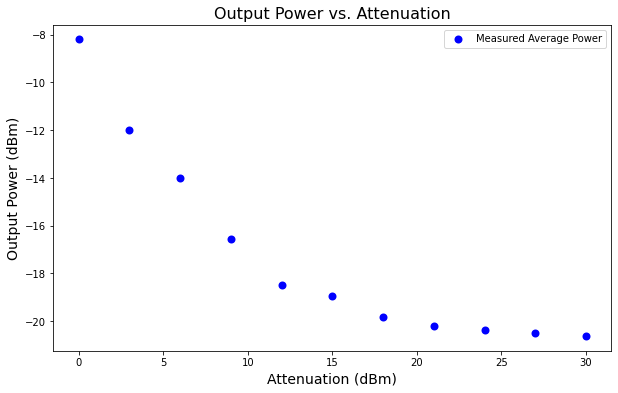

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Attenuation values (dB)
attenuations = np.array([0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30])

# Average power (dBm) for each attenuation (excluding t=0)
avg_powers = np.array([
    np.mean([-8.223, -8.218, -8.222, -8.234, -8.209, -8.181, -8.142, -8.194, -8.179, -8.181, -8.189]),  # 0dB
    np.mean([-11.975, -12.012, -12.018, -11.942, -12.091, -12.015, -11.949, -11.968, -11.990]),           # 3dB
    np.mean([-14.114, -14.099, -14.072, -14.073, -13.995, -13.979, -13.987, -13.965, -13.973, -13.957]),  # 6dB
    np.mean([-16.527, -16.475, -16.542, -16.615, -16.604, -16.568, -16.546, -16.559, -16.551]),           # 9dB
    np.mean([-18.521, -18.477, -18.457, -18.462, -18.451, -18.452, -18.476, -18.457, -18.468, -18.477, -18.438]),  # 12dB
    np.mean([-18.974, -18.957, -18.947, -18.966, -18.938, -18.920, -18.905, -18.929, -18.932, -18.932, -18.923, -18.938]),  # 15dB
    np.mean([-19.846, -19.833, -19.802, -19.808, -19.803, -19.803, -19.772, -19.806, -19.811]),           # 18dB
    np.mean([-20.228, -20.209, -20.187, -20.194, -20.192, -20.201, -20.185, -20.162, -20.170, -20.174]),  # 21dB
    np.mean([-20.436, -20.431, -20.404, -20.368, -20.350, -20.381, -20.372, -20.366, -20.360, -20.366, -20.396]),  # 24dB
    np.mean([-20.557, -20.518, -20.520, -20.494, -20.508, -20.524, -20.490, -20.509, -20.505, -20.489, -20.511]),  # 27dB
    np.mean([-20.637, -20.638, -20.651, -20.638, -20.628, -20.611, -20.600, -20.590, -20.605])           # 30dB
])

# Plot only the average points
plt.figure(figsize=(10, 6))
plt.scatter(attenuations, avg_powers,linewidth = 2,  color='blue', label='Measured Average Power')
plt.xlabel('Attenuation (dBm)', fontsize = 14)
plt.ylabel('Output Power (dBm)', fontsize = 14)
plt.title('Output Power vs. Attenuation', fontsize = 16)
plt.grid(False)
plt.legend()
plt.savefig("attenuation.jpg")
plt.show()

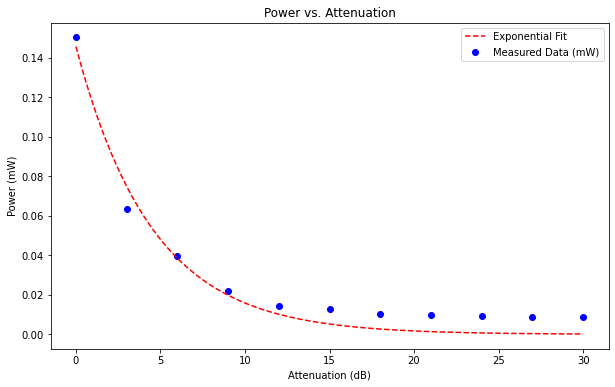

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your raw data (attenuation in dB, power in dBm)
attenuation = np.array([0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
power_dBm = np.array([-8.23, -11.99, -14.04, -16.54, -18.46, -18.94, 
                     -19.81, -20.19, -20.38, -20.50, -20.62])

# Convert dBm to linear scale (mW) for exponential fit
power_mW = 10**(power_dBm / 10)

# Define exponential function: P = a * exp(-b * x)
def exp_func(x, a, b):
    return a * np.exp(-b * x)

# Fit exponential curve
params, _ = curve_fit(exp_func, attenuation, power_mW, p0=[0.15, 0.23])
a_fit, b_fit = params

# Generate fitted curve
x_fit = np.linspace(0, 30, 100)
y_fit = exp_func(x_fit, a_fit, b_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(attenuation, power_mW, color='blue', label='Measured Data (mW)')
plt.plot(x_fit, y_fit, 'r--', 
         label=f'Exponential Fit')
plt.xlabel('Attenuation (dB)')
plt.ylabel('Power (mW)')
plt.title('Power vs. Attenuation')
plt.grid(False)

plt.legend()


plt.savefig("attenuation_1_new.jpg")
plt.show()

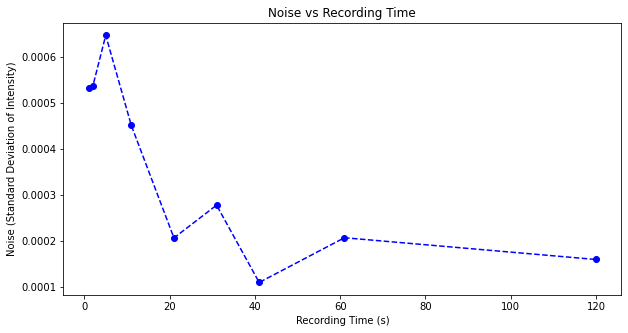

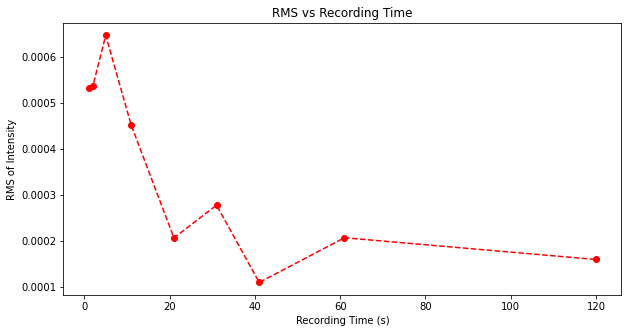

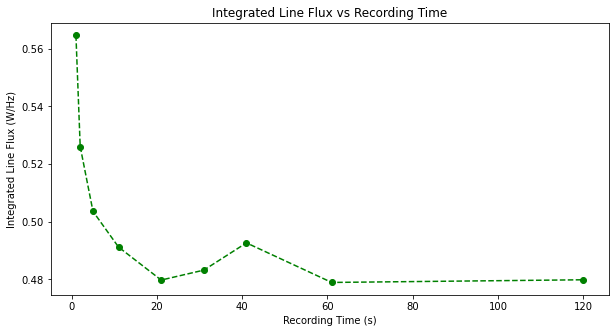

Estimated Brightness Temperature: 489631467442.68 K


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the recording times and corresponding file names
recording_times = [1, 2, 5, 11, 21, 31, 41, 61, 120]
file_names = [f'ex1-8-{time}s.txt' for time in recording_times]

# Initialize lists to store results
noise_values = []
rms_values = []
integrated_flux_values = []

for file_name in file_names:
    # Load data from file (assuming the file is in the same directory)
    data = np.loadtxt(file_name, skiprows=1)  # Skip header
    frequency = data[:, 0]
    intensity = data[:, 1]

    # Calculate noise (standard deviation of intensity)
    noise = np.std(intensity)
    noise_values.append(noise)

    # Calculate RMS
    rms = np.sqrt(np.mean(intensity**2))
    rms_values.append(rms)

    # Calculate integrated line flux (sum of intensity * frequency step)
    # Assuming uniform frequency steps
    df = frequency[1] - frequency[0]  # Frequency step
    integrated_flux = np.sum(intensity) * df
    integrated_flux_values.append(integrated_flux)

# Plot Noise vs Recording Time
plt.figure(figsize=(10, 5))
plt.plot(recording_times, noise_values, 'bo--')
plt.xlabel('Recording Time (s)')
plt.ylabel('Noise (Standard Deviation of Intensity)')
plt.title('Noise vs Recording Time')
plt.grid(False)
plt.savefig("noise_time.jpg")
plt.show()

# Plot RMS vs Recording Time
plt.figure(figsize=(10, 5))
plt.plot(recording_times, rms_values, 'ro--')
plt.xlabel('Recording Time (s)')
plt.ylabel('RMS of Intensity')
plt.title('RMS vs Recording Time')
plt.grid(False)
plt.savefig("rms_time.jpg")
plt.show()

# Plot Integrated Flux vs Recording Time
plt.figure(figsize=(10, 5))
plt.plot(recording_times, integrated_flux_values, 'go--')
plt.xlabel('Recording Time (s)')
plt.ylabel('Integrated Line Flux (W/Hz)')
plt.title('Integrated Line Flux vs Recording Time')
plt.grid(False)
plt.savefig("lineflux_time.jpg")
plt.show()

# Estimate Temperature (simplified)
# Assuming a wavelength for the observed line (e.g., CO at 115 GHz -> lambda = 2.6 mm)
lambda_ = 2.6e-3  # meters
k_B = 1.380649e-23  # Boltzmann constant in J/K

# Use the average intensity for temperature estimation
average_intensity = np.mean([np.mean(np.loadtxt(fname, skiprows=1)[:, 1]) for fname in file_names])
T_B = (average_intensity * lambda_**2) / (2 * k_B)

print(f"Estimated Brightness Temperature: {T_B:.2f} K")

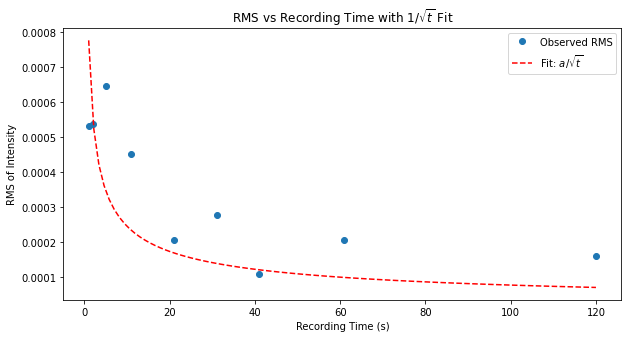

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the theoretical model: 1/sqrt(t)
def inverse_sqrt(t, a):
    return a / np.sqrt(t)

# Your existing data
recording_times = np.array([1, 2, 5, 11, 21, 31, 41, 61, 120])  # Convert to numpy array
rms_values = np.array(rms_values)  # Use your precomputed RMS values

# Fit the model to the data
popt, pcov = curve_fit(inverse_sqrt, recording_times, rms_values)
a_fit = popt[0]  # Fitted scaling parameter

# Generate fitted curve
t_fit = np.linspace(min(recording_times), max(recording_times), 100)
rms_fit = inverse_sqrt(t_fit, a_fit)

# Plot RMS vs Recording Time with fit
plt.figure(figsize=(10, 5))
plt.plot(recording_times, rms_values, 'o', label='Observed RMS')
plt.plot(t_fit, rms_fit, 'r--', label=f'Fit: $a / \sqrt{{t}}$')
plt.xlabel('Recording Time (s)')
plt.ylabel('RMS of Intensity')
plt.title('RMS vs Recording Time with $1/\sqrt{t}$ Fit')
plt.legend()
plt.grid(False)
plt.savefig("rms_fitting.jpg")
plt.show()

In [13]:
plt.scatter()

2.0000272067848083e-06

In [14]:
integrated_flux_values

[0.564677349595293,
 0.5260902528404952,
 0.5035991156882028,
 0.4912085698212612,
 0.47977342690580954,
 0.48322304454932297,
 0.4926727694561287,
 0.47894590421914185,
 0.47987078219016327]

In [16]:
np.average(integrated_flux_values)

0.500006801696202

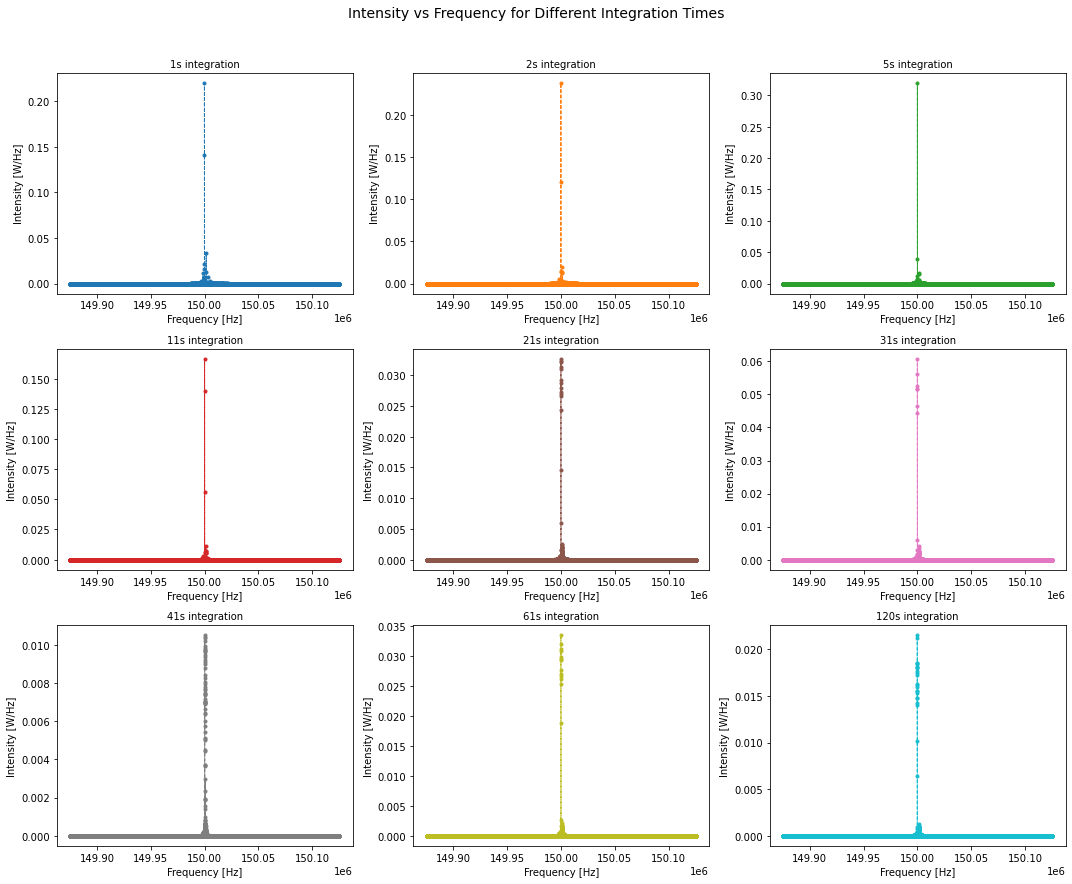

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# File information
recording_times = [1, 2, 5, 11, 21, 31, 41, 61, 120]  # Assuming 9 files (you mentioned 8)
file_names = [f'ex1-8-{time}s.txt' for time in recording_times]

# Create figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for 9 files
fig.suptitle('Intensity vs Frequency for Different Integration Times', y=1.02, fontsize=14)

# Define a color palette (using tab10 colormap)
colors = plt.cm.tab10(np.linspace(0, 1, len(file_names)))

# Plot each file in a subplot
for i, (file, time, color) in enumerate(zip(file_names, recording_times, colors)):
    # Get subplot position (convert linear index to 2D)
    ax = axes[i//3, i%3]
    
    try:
        # Read data
        data = np.loadtxt(file, skiprows=1)
        frequency = data[:, 0]
        intensity = data[:, 1]
        
        # Plot
        ax.plot(frequency, intensity, '.--',  color=color, linewidth=1)
        ax.set_title(f'{time}s integration', fontsize=10)
        ax.set_xlabel('Frequency [Hz]')
        ax.set_ylabel('Intensity [W/Hz]')
        ax.grid(False)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
        
        # Set consistent y-limits if needed (optional)
        # ax.set_ylim(0, max_intensity_across_all_files)
        
    except FileNotFoundError:
        ax.text(0.5, 0.5, f'File not found:\n{file}', 
               ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("Intensity_freq.jpg")
plt.show()

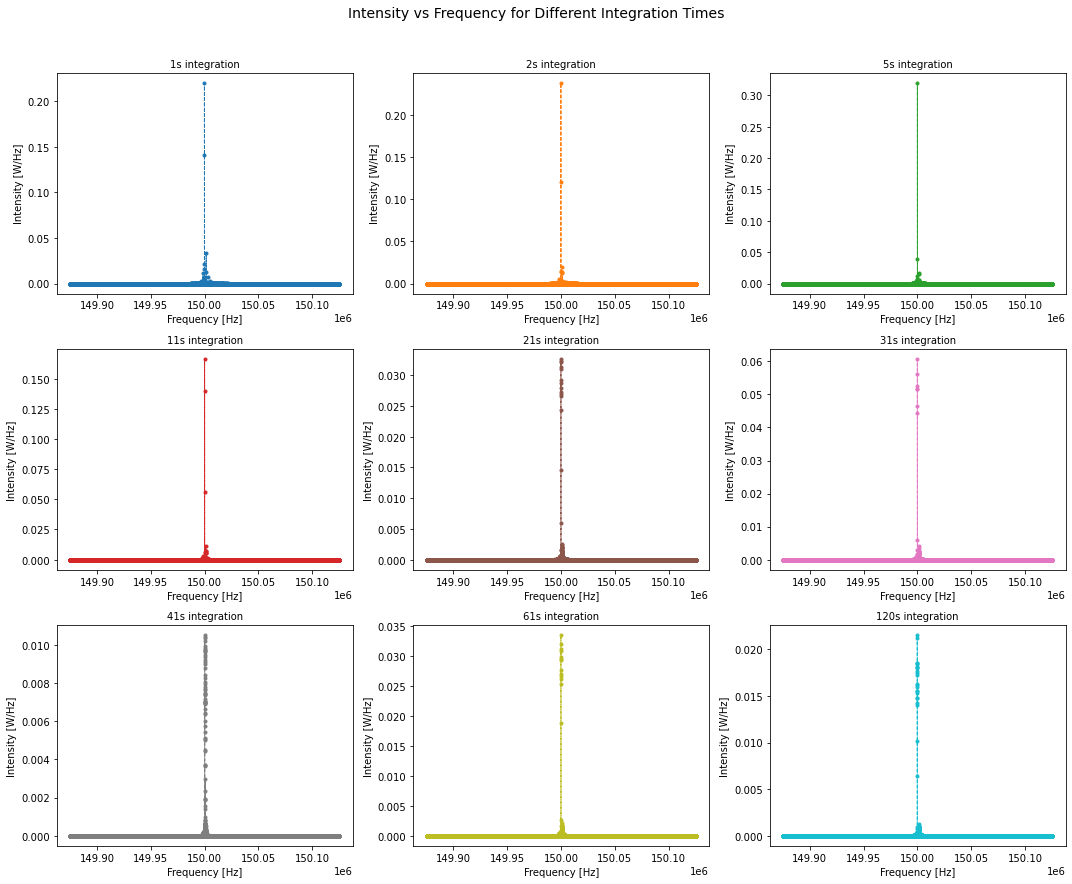

Integration Time (s) | Brightness Temperature Tb (K)
---------------------------------------------
                 1 | 3.18e+22
                 2 | 3.44e+22
                 5 | 4.63e+22
                11 | 2.40e+22
                21 | 4.72e+21
                31 | 8.78e+21
                41 | 1.52e+21
                61 | 4.84e+21
               120 | 3.11e+21


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Physical constants
c = 3.0e8  # speed of light in m/s
kb = 1.3806e-23  # Boltzmann constant in m^2 kg s^-2 K^-1

# File information
recording_times = [1, 2, 5, 11, 21, 31, 41, 61, 120]
file_names = [f'ex1-8-{time}s.txt' for time in recording_times]

# Prepare figure
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Intensity vs Frequency for Different Integration Times', y=1.02, fontsize=14)

# Define a color palette
colors = plt.cm.tab10(np.linspace(0, 1, len(file_names)))

# List to store Tb values
Tb_values = []

for i, (file, time, color) in enumerate(zip(file_names, recording_times, colors)):
    ax = axes[i//3, i%3]
    
    try:
        data = np.loadtxt(file, skiprows=1)
        frequency = data[:, 0]
        intensity = data[:, 1]
        
        # Plot
        ax.plot(frequency, intensity, '.--', color=color, linewidth=1)
        ax.set_title(f'{time}s integration', fontsize=10)
        ax.set_xlabel('Frequency [Hz]')
        ax.set_ylabel('Intensity [W/Hz]')
        ax.grid(False)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
        
        # Find peak intensity and corresponding frequency
        peak_index = np.argmax(intensity)
        I_nu_peak = intensity[peak_index]
        nu_peak = frequency[peak_index]
        
        # Calculate Tb
        Tb = (I_nu_peak * c**2) / (2 * kb * nu_peak**2)
        Tb_values.append((time, Tb))
        
    except FileNotFoundError:
        ax.text(0.5, 0.5, f'File not found:\n{file}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_axis_off()

# Layout and save
plt.tight_layout()
#plt.savefig("Intensity_freq.jpg")
plt.show()

# Print Tb values nicely
print("Integration Time (s) | Brightness Temperature Tb (K)")
print("-"*45)
for time, Tb in Tb_values:
    print(f"{time:>18} | {Tb:.2e}")
